# Chapter 5: Brownian Dynamics

<img src="BD_fig_01.png" alt="title" width="600px" />

## Motivation

**Brownian dynamics**: describes systems at the microscale.

**Key advantages**:
- Effective description of the dynamics where inertia is negligible and thermal noise is prevalent.
- Example of stochastic system.

**Stochastic processes and stochastic differential equations**

Describe systems that are non-deterministic, subject to noise and other random forces.


### Applications

**Physics**
- microscopic and nanoscopic particles behaviour
- fluid dynamics 
- diffusion processes

**Economics**
- mathematical finance models


## Application example: Controlling the dynamics of colloidal particles by critical Casimir forces

[Controlling the dynamics of colloidal particles by critical Casimir forces](https://pubs.rsc.org/en/content/articlelanding/2019/sm/c8sm01376d)

<img src="BD_fig_02.png" alt="title" width="600px" />

## Random walk

**Example:** Flipping of a coin.

$$
    x_{i+1} = x_i + w_{\mathrm{flip}},    
$$

where $w_{\mathrm{flip}}$ represents a random selection between -$1$ and $+1$.

**General Properties of a random walk:**

$\langle x_i  \rangle = 0$ for all $x_i$ (assuming $x_0=0$)

$\langle x_i^2 \rangle = i$


**Universality**

It's not mandatory to have a *flipcoin* distribution. 
We can have other discrete distributions (ex: $w_{\mathrm{asymm}}$ with equal probabilities of choosing $[-1, \ (1-\sqrt{3})/2, \ (1+\sqrt{3})/2]$), or a continuous distribution (ex: Gaussian distribution with mean $0$ and variance $1$)



Let's simulate a random walk and check the properties.

Below a function for random walk with steps drawn from a discrete distribution.

In [1]:
import math
import numpy as np 
    
def rw_discrete(x0, n, p, s):
    """
    Function to generate a random walk with a pi probability distribution 
    of the steps s.
    This function does not check whether p is a probability distribution 
    or mean(s) = 0. Also, doesn't check whether s and p have the same shape.
    Pass p and s such that they have the same shape, sum(p) == 1 and 
    sum(s) == 0.
    
    Parameters
    ==========
    x0 : Initial position.
    n : Number of steps.
    p : Discrete probability distribution. 
    s : Discrete steps.
    """
        
    p = p.flatten()  # Flatten the discrete probability.
    s = s.flatten()  # Flatten the corresponding steps.
    
    thresholds = np.cumsum(p)  # Same shape as p and s.
    
    rn = np.random.rand(n - 1) 
    
    x = np.zeros(n)
    x[0] = x0
    
    for i in range(n - 1):        
        # Compare the random number with the threshold list.
        comparison = np.where(thresholds >= rn[i])              
        j = comparison[0][0]  # Extract the index of the step length.        
        dx = s[j]  # Determines the step.
        x[i + 1] = x[i] + dx  # Sets the new position.
       
        # The previous steps can be expressed in one line as follows.
        # x[i + 1] = x[i] + s[np.where(thresholds >= rn[i])[0][0]]
           
    return x


Below a function for a random walk with steps drawn from a Gaussian distribution with mean $\mu = 0$ and standard deviation $\sigma = 1$ 

In [2]:
def rw_Gaussian(x0, n):
    """
    Function to generate a random walk with a Gaussian distribution with 
    mean 0 and standard deviation 1.
    
    Parameters
    ==========
    x0 : Initial position.
    n : Number of steps.
    """
        
    rn = np.random.normal(0, 1, n-1) 
    x = np.zeros(n)
    x[1:] = np.cumsum(rn)
    x += x0
           
    return x

In [3]:
x0 = 0  # Starting point. 
n = 100  # Number of steps in the random walk.
p = np.array([.5, .5])  # Probability distribution.
s = np.array([-1, 1])  # Length of the steps.

# Check the average length of the single step distribution.
mu = np.sum(p * s)
print(f'Single step average: {mu:.3f}')

# Check the variance of the single step distribution.
sigma2 = np.sum(p * (s - mu) ** 2)
print(f'Single step variance: {sigma2:.3f}')

# Generate the random walk.
x = rw_discrete(x0, n, p, s)
# x = rw_Gaussian(x0, n)

Single step average: 0.000
Single step variance: 1.000


Plot the generated random walk.

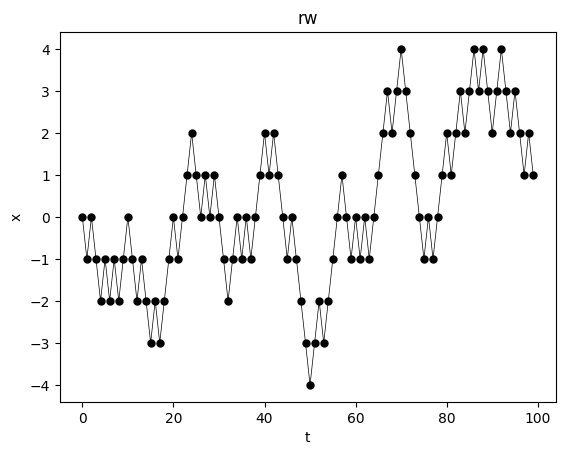

In [4]:
from matplotlib import pyplot as plt

plt.plot(range(n), x, '.-', color='k', markersize=10, linewidth=0.5, 
         label='rw')

plt.title('rw')

plt.xlabel('t')
plt.ylabel('x')

plt.show()

Generate $N_{\rm traj}$ different trajectories and check their appearance.

In [5]:
N_traj = 1000

x0 = 0  # Starting point. 
n = 1000  # Number of steps in the random walk.

p = np.array([.5, .5])  # Probability distribution.
s = np.array([-1, 1])  # Length of the steps.

# Preallocate.
x = np.zeros([N_traj, n])

# Generate N_traj different trajectories originating from x0.

for i in range(N_traj):
    x[i, :] = rw_discrete(x0, n, p, s)  
    # x[i, :] = rw_Gaussian(x0, n)  

    

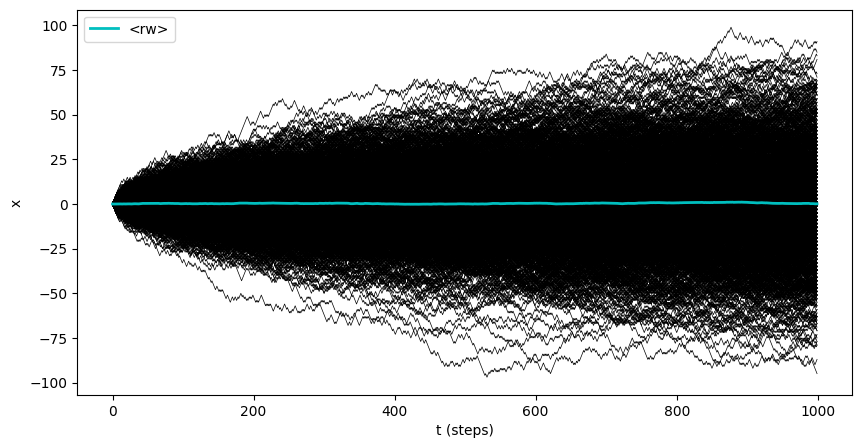

In [6]:
x_av = np.mean(x, axis=0)  # Ensamble average.

plt.figure(figsize=(10, 5))
for i in range(N_traj):
    plt.plot( range(n), x[i,:], '-', color='k', linewidth=0.5)
plt.plot(range(n), x_av, '-', color='c', linewidth=2, label='<rw>')

plt.legend()
plt.xlabel('t (steps)')
plt.ylabel('x')

plt.show()

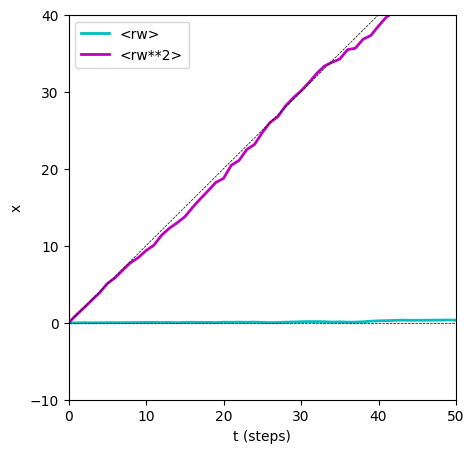

In [7]:
x_var = np.mean((x - np.repeat(np.reshape(x_av, (1, n)), N_traj, axis=0))**2, 
               axis=0)  # Variance. Or: MSD.

plt.figure(figsize=(5, 5))
plt.plot(range(n), x_av, '-', color='c',linewidth=2, label='<rw>')
plt.plot(range(n), x_var, '-', color='m',linewidth=2, label='<rw**2>')
plt.plot(range(n), range(n), '--', color='k',linewidth=0.5)
plt.plot(range(n), np.zeros(n), '--', color='k',linewidth=0.5)

plt.legend()

plt.xlabel('t (steps)')
plt.ylabel('x')

plt.xlim([0, 50])
plt.ylim([-10, 40])

plt.show()

Let's check the distribution of the last position.

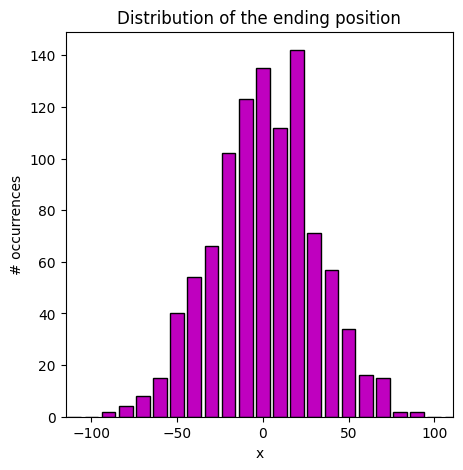

In [8]:
bin_width = 10
bins_edges = np.arange(- n - bin_width / 2, n + bin_width / 2 + .1, bin_width)
bins = np.arange(- n, n + .1, bin_width)

# print(bins_edges.shape)
# print(bins.shape)

distribution = np.histogram(x[:, -1], bins=bins_edges)

plt.figure(figsize=(5, 5))

plt.bar(bins, distribution[0], color='m', width=0.8 * bin_width, edgecolor='k')

plt.title('Distribution of the ending position')

plt.xlabel('x')
plt.ylabel('# occurrences')
plt.xlim([np.amin(x[:, -1]) - 2 * bin_width , np.amax(x[:, -1]) + 2 * bin_width])

plt.show()


## White noise

**Stochastic differential equation:**

$$
\dot{x}(t) = W(t),
$$


**Discretization:**

$$
x_{i+1} = x_i + W_i\Delta t,
$$

$W_i$ : random number from a Gaussian distribution with zero mean and variance $\sigma_W^2$

Mean: 
$$\langle x_n \rangle = 0$$

Variance, or MSD (Mean Square Displacement) :
$$
\langle x_n^2 \rangle = n \sigma^2_{W} \Delta t^2 = \sigma^2_{W} \Delta t \cdot t, \quad {\rm where}\, t = n\Delta t
$$

For a numerical simulation of a physical system, we choose a proper simulation time step $\Delta t$. However, the physical properties of the system **do not depend** on this choice.

Therefore: if we set a $\Delta t$, we must simulate the corresponding white noise $W_i$ with:

$$W_i = \frac{w_i}{\sqrt{\Delta t}},$$ 

where $w_i$ is a random number with a Gaussian distribution with mean $0$ and variance $1$. 


**Diffusion with white noise:**

$$
x(t+\Delta t) = x (t) + w_i \sqrt{\Delta t}.  
$$




Simulation with white noise

In [9]:
def free_diffusion(x0, sigma_w, n, dt):
    """
    Function to generate the time evolution for a free-diffusing particle
    subject to a white noise with mean 0 and standard deviation sigma_w.
    
    Parameters
    ==========
    x0 : Initial position.
    sigma_w : Standard deviation of the white noise.
    n : Number of steps.
    dt : Time step.
    """
        
    rn = sigma_w * np.sqrt(dt) * np.random.normal(0, 1, n - 1) 
    x = np.zeros(n)
    x[1:] =  np.cumsum(rn)
    x += x0
           
    return x

In [14]:
dt = 0.1  # Set time step [s]. Try 0.1, 0.05, 0.01.
duration = 5  # Total duration.

n = int(np.ceil(duration / dt))  # Number of timesteps.
sigma_w = 3

x0 = 0

N_traj = 100

# Preallocate.
x = np.zeros([N_traj, n])

# Generate N_traj different trajectories originating from x0.

for i in range(N_traj):
    x[i, :] = free_diffusion(x0, sigma_w, n, dt) 

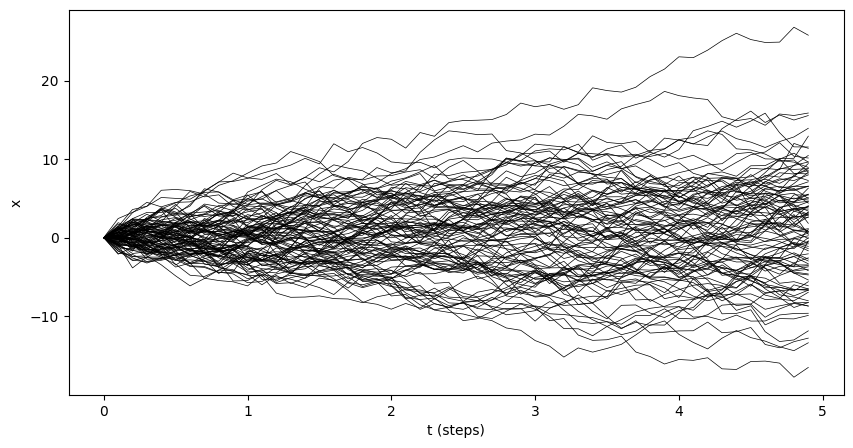

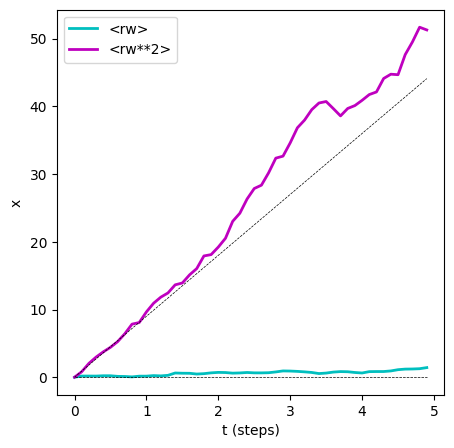

In [15]:
t = dt * np.arange(n)

plt.figure(figsize=(10, 5))
for i in range(N_traj):
    plt.plot( t, x[i,:],'-', color='k', linewidth=0.5)

plt.xlabel('t (steps)')
plt.ylabel('x')

plt.show()

# Mean - Ensamble average.
x_av = np.mean(x, axis=0) 

# MSD - Ensamble average.
MSD = np.mean((x - np.repeat(np.reshape(x_av, (1, n)), N_traj, axis=0)) ** 2, 
               axis=0)  # Variance. Or: MSD.

plt.figure(figsize=(5, 5))
plt.plot(t, x_av, '-', color='c',linewidth=2, label='<rw>')
plt.plot(t, MSD, '-', color='m',linewidth=2, label='<rw**2>')
plt.plot(t, sigma_w ** 2 * t, '--', color='k', linewidth=0.5)
plt.plot(t, np.zeros(n), '--', color='k', linewidth=0.5)

plt.legend()

plt.xlabel('t (steps)')
plt.ylabel('x')

plt.show()

## Brownian Motion

**Langevin equation:**

$$
    m\ddot{x} = - \gamma \dot{x} + \sqrt{2k_{\mathrm{B}}T \gamma} \, W(t),  
$$


**Case $m \neq 0$:**

Finite difference:
$$
    m \frac{x_i - 2 x_{i-1} + x_{i-2}}{(\Delta t)^2} = - \gamma \frac{x_i-x_{i-1}}{\Delta t} + \sqrt{2k_{\mathrm{B}}T \gamma} 
$$

Solution:
$$
    x_i = \frac{2 + \Delta t (\gamma/m)}{1+\Delta t (\gamma/m)} x_{i-1} - \frac{1}{1+\Delta t \frac{\gamma}{m}} x_{i-2} + \frac{\sqrt{2k_{\mathrm{B}}T \gamma}}{m \left[1+\Delta t \frac{\gamma}{m}\right]} (\Delta t)^{3/2} w_i.
$$

$\tau = m/\gamma$ :  momentum relaxation time.

**Case $m = 0$:**

Finite difference:
$$
   \gamma \frac{x_i-x_{i-1}}{\Delta t} = \sqrt{2k_{\mathrm{B}}T \gamma} 
$$

Solution:
$$
    x_i = x_{i-1} + \sqrt{\frac{2k_{\mathrm{B}}T\Delta t}{\gamma}} w_i.
$$

### Simulation: inertial and viscous regimes

Implement a function to simulate the solution for the Langevin equation with inertia and without inertia (viscous, overdamped regime)

In [17]:
def evolution_inertial(x0, v0, m, gamma, dt, duration):
    """
    Function to generate the solution for the Langevin equation with 
    inertia.
    
    Parameters
    ==========
    x0 : Initial position of the oscillator [m].
    v0 : Initial velocity of the oscillator [m/s].
    m : Mass of the particle [kg].
    gamma : Friction coefficient [N*s/m].    
    dt : Time step for the numerical solution [s].
    duration : Total time for which the solution is computed [s].
    """
    
    kBT = 4.11e-21  # kB*T at room temperature [J].
    D = kBT / gamma  # Diffusion constant [m^2 / s].
    tau = m / gamma  # Momentum relaxation time [s].
    
    # Coefficients for the finite difference solution.
    c_1 = (2 + dt / tau) / (1 + dt / tau)
    c_2 = - 1 / (1 + dt / tau)
    c_noise = dt * np.sqrt(2 * kBT * gamma * dt) / m / (1 + dt / tau)

    N = math.ceil(duration / dt)  # Number of time steps.

    x = np.zeros(N)
    rn = np.random.normal(0, 1, N - 2)
    
    x[0] = x0
    x[1] = x0 + v0 * dt

    for i in range(N - 2):
        x[i + 2] = c_1 * x[i + 1] + c_2 * x[i] + c_noise * rn[i]

    return x, D, tau

In [18]:
def evolution_viscous(x0, gamma, dt, duration):
    """
    Function to generate the solution for the Langevin equation with 
    inertia.
    
    Parameters
    ==========
    x0 : Initial position of the oscillator [m].
    gamma : Friction coefficient [N*s/m].    
    dt : Time step for the numerical solution [s].
    duration : Total time for which the solution is computed [s].
    """
    
    kBT = 4.11e-21  # kB*T at room temperature [J].
    
    D = kBT / gamma  # Diffusion constant [m^2 / s].
    
    # Coefficients for the finite difference solution.
    c_noise = np.sqrt(2 * D * dt)

    N = math.ceil(duration / dt)  # Number of time steps.

    x = np.zeros(N)
    rn = np.random.normal(0, 1, N - 1)
    
    x[0] = x0

    for i in range(N - 1):
        x[i + 1] = x[i] + c_noise * rn[i]

    return x, D

Perform the numerical solution for a colloidal particle in water at room temperature.

In [19]:
# Simulation for a colloidal particle in water at room temperature.

R = 1e-6  # Radius of the Brownian particle [m].
eta = 1e-3  # Viscosity of the medium.
gamma = 6 * np.pi * R * eta  # Drag coefficient of the medium. 
rho = 2.e+3  # Density of the particle [kg/m^3]
m = 4 * np.pi / 3 * rho * R ** 3  # Mass of the particle [kg].

tau = m / gamma  # Momentum relaxation time.

dt = 1e-3  # Time step [s].
duration = 2  # Total time [s].



x0 = 0  # Initial position [m].
v0 = 0  # Initial velocity [m/s].

print(f'tau={tau:.3e} s.') 

x_mass, D_m, tau_m = evolution_inertial(x0, v0, m, gamma, dt, duration)
x_visc, D_v = evolution_viscous(x0, gamma, dt, duration)

t = dt * np.arange(math.ceil(duration / dt))


tau=4.444e-07 s.


Plot the evolution of various quantities.

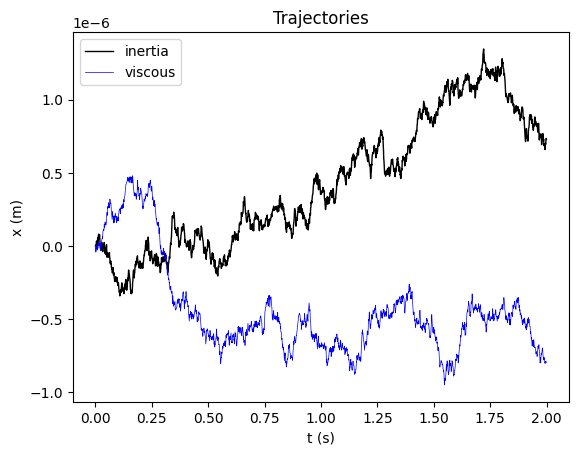

In [20]:
plt.plot(t, x_mass, '-', color='k', linewidth=1, label='inertia')
plt.plot(t, x_visc, '-', color='b', linewidth=0.5, label='viscous')

plt.legend()

plt.title('Trajectories')

plt.xlabel('t (s)')
plt.ylabel('x (m)')

plt.show()

**How can we compare the two solutions?**

We need to use the **same noise**.

In [21]:
# Simulation for a colloidal particle in water at room temperature.

R = 1e-6  # Radius of the Brownian particle [m].
eta = 1e-3  # Viscosity of the medium.
gamma = 6 * np.pi * R * eta  # Drag coefficient of the medium. 
kBT = 4.11e-21  # kB*T at room temperature [J].
D = kBT / gamma  # Diffusion constant [m^2 / s].

rho = 2.e+3  # Density of the particle [kg/m^3]
m = 4 * np.pi / 3 * rho * R ** 3  # Mass of the particle [kg].

tau = m / gamma  # Momentum relaxation time.

# This is to show the time scale t >> tau.
dt = 1e-3  # Time step [s]. dt >> tau.
duration = 2  # Total time [s].

# This is to show the difference for t < tau.
# dt = 0.1 * tau  # Time step [s].
# duration = 10 * tau  # Total time [s].

# This is to show the ballistic-diffusive transition in the MSD.
# dt = 0.1 * tau  # Time step [s].
# duration = 1000 * tau  # Total time [s].

x0 = 0  # Initial position [m].
v0 = 0  # Initial velocity [m/s]. Relevant for the inertial case only.

print(f'tau={tau:.3e} s.') 

# Coefficients for the finite difference solution. Inertial case.
c_1 = (2 + dt / tau) / (1 + dt / tau)
c_2 = - 1 / (1 + dt / tau)  # Note the minus sign! 
c_m_noise = dt * np.sqrt(2 * kBT * gamma * dt) / m / (1 + dt / tau)
    
# Coefficients for the finite difference solution. Viscous case.
c_noise = np.sqrt(2 * D * dt)

N = math.ceil(duration / dt)  # Number of time steps.

x_visc = np.zeros(N)
x_visc[0] = x0

x_mass = np.zeros(N)
x_mass[0] = x0
x_mass[1] = x0 + v0 * dt

rn = np.random.normal(0, 1, N - 1)

for i in range(N - 1):
    x_visc[i + 1] = x_visc[i] + c_noise * rn[i]
    
for i in range(N - 2):
    x_mass[i + 2] = c_1 * x_mass[i + 1] + c_2 * x_mass[i] + c_m_noise * rn[i]


t = dt * np.arange(math.ceil(duration / dt))



tau=4.444e-07 s.


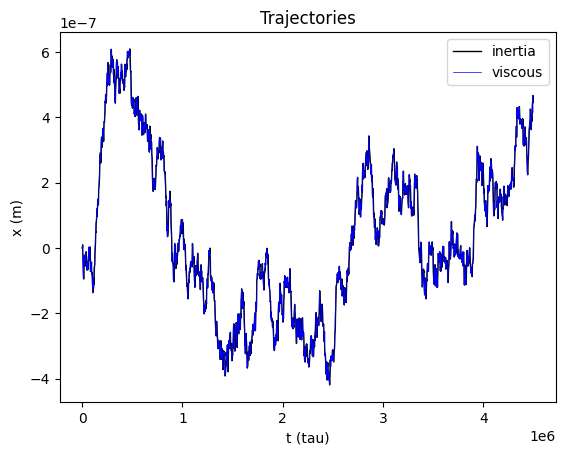

In [22]:
plt.plot(t / tau, x_mass, '-', color='k', linewidth=1, label='inertia')
plt.plot(t / tau, x_visc, '-', color='b', linewidth=0.5, label='viscous')


plt.legend()

plt.title('Trajectories')

plt.xlabel('t (tau)')
plt.ylabel('x (m)')

plt.show()

Let's calculate the MSD

In [23]:
def MSD_1d(x, L, dt):
    """
    Function to calculate the MSD.
    
    Parameters
    ==========
    x : Trajectory (x component).
    L : Indicates the maximum delay (L * dt) considered.
    """
    
    msd = np.zeros(L)
    t_delay = np.arange(L) * dt
    
    nelem = np.size(x)

    for n in range(L):
        Nmax = nelem - n
        dx = x[n:nelem] -  x[0: Nmax]
        msd[n] += np.mean(dx ** 2)

    return msd, t_delay


In [24]:
Nmax = int(0.5 * np.size(x_visc))


msd_visc, t_visc = MSD_1d(x_visc, Nmax, dt)
msd_mass, t_mass = MSD_1d(x_mass, Nmax, dt)


#print(msd)
#print(tdelay)

Plot MSD

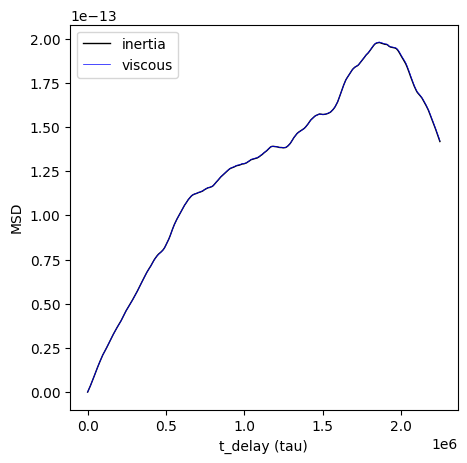

In [25]:
plt.figure(figsize=(5,5))

plt.plot(t_mass / tau, msd_mass, '-', color='k', linewidth=1, 
         label='inertia')
plt.plot(t_visc / tau, msd_visc, '-', color='b', linewidth=0.5, 
         label='viscous')

plt.legend()

plt.xlabel('t_delay (tau)')
plt.ylabel('MSD')

plt.show()

Plot MSD in log-log scale

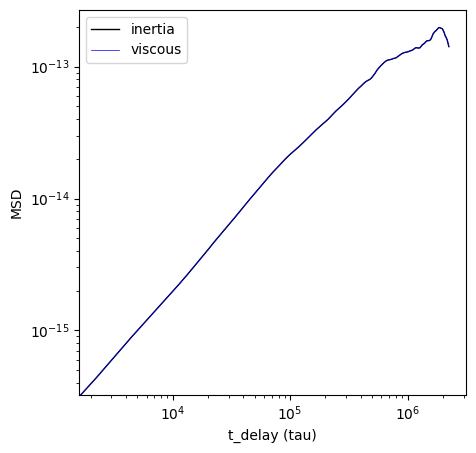

In [26]:
plt.figure(figsize=(5,5))

plt.loglog(t_mass / tau, msd_mass, '-', color='k', linewidth=1, 
         label='inertia')
plt.loglog(t_visc / tau, msd_visc, '-', color='b', linewidth=0.5, 
         label='viscous')

plt.legend()

plt.xlabel('t_delay (tau)')
plt.ylabel('MSD')

plt.show()

### Calculate $D$ from the graph ${\rm MSD}$ vs $t_{\rm delay}$


$$
    \mathrm{MSD}(t_{\rm delay}) = \left\langle \left[ x(t+t_{\rm delay}) - x(t) \right]^2 \right\rangle = 2\ D\ t_{\rm delay},
$$

$$
    \log{\mathrm{MSD}} = \log{t_{\rm delay}} + \log(2\ D)
$$

Let's calculate $D$ from the graph.



In [27]:
x_data = np.log(t_visc[1:])
y_data = np.log(msd_visc[1:])

c = np.polyfit(x_data, y_data - x_data, 0)  # Slope is assumed to be 1.

D_exp = 0.5 * np.exp(c)[0]

print(f'D_exp = {D_exp:.3E} (from MSD)')
print(f'D = {D:.3E} (value used in simulation)')


D_exp = 1.445E-13 (from MSD)
D = 2.180E-13 (value used in simulation)


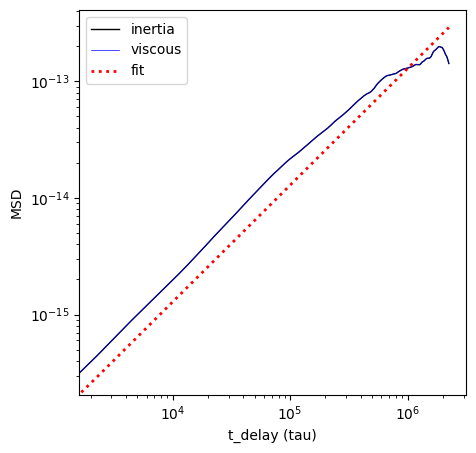

In [28]:
plt.figure(figsize=(5,5))

plt.loglog(t_mass / tau, msd_mass, '-', color='k', linewidth=1, 
         label='inertia')
plt.loglog(t_visc / tau, msd_visc, '-', color='b', linewidth=0.5, 
         label='viscous')
plt.loglog(t_visc / tau, 2 * D_exp * t_visc, ':', color='r', 
           linewidth=2, label='fit')


plt.legend()

plt.xlabel('t_delay (tau)')
plt.ylabel('MSD')

plt.show()